# TP 8 Distribution Gaussienne
Dans ce TP, nous aimerions explorer le classifieur base sur les distributions gaussiennnes pour une classification binaire.



# Importation des librairies necessaires au travail

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
from sklearn.metrics import f1_score

# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [2]:
# données
X = np.genfromtxt('X.csv', delimiter=',', dtype=float)
X.shape

(307, 2)

Dans ces données (data), les 2 premières colonnes representent les caracteristiques de l'ensemble d'entrainement.

Chaque ligne represente un exemple de notre ensemble de données. 


# Entrainement 
dans cette partie nous allons calculer les parametres de la disribution gaussienne de chaque caracteristique.

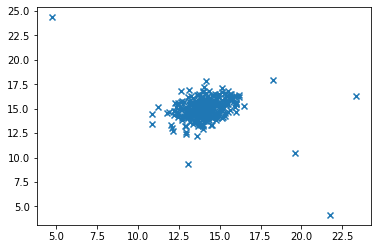

In [3]:
plt.scatter(X[:,0],X[:,1], marker ='x')

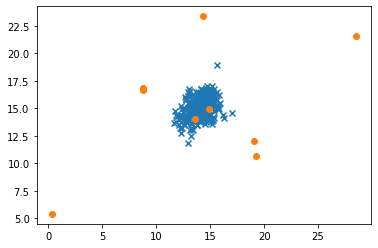

In [4]:
Xv = np.genfromtxt('Xval.csv', delimiter=',', dtype=float)
Xv.shape
yv = np.genfromtxt('yval.csv', delimiter=',', dtype=float)
yv.shape
X0=np.empty((0, 2), float)
X1=np.empty((0, 2), float)
for i in range (len(Xv)):
    if yv[i]==0:
        X0=np.append(X0,np.array([[Xv[i,0],Xv[i,1]]]),axis=0)
    else:
        X1=np.append(X1,np.array([[Xv[i,0],Xv[i,1]]]),axis=0)
plt.scatter(X0[:,0],X0[:,1],marker='x')
plt.scatter(X1[:,0],X1[:,1],marker='o')

Mettons un lien avec ce que nous avons appris en regression linéaire

In [5]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)

In [6]:
def calculProba(X,m,v):
    return (1 / (np.sqrt(2 * v * np.pi))) * np.exp(- np.power(X - m, 2) / (2 * v))

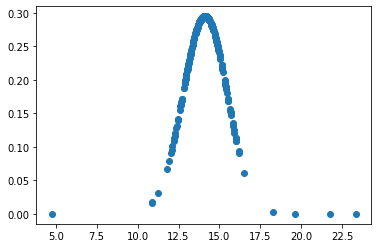

In [7]:
prob=calculProba(X,m,v)
plt.scatter(X[:,0],prob[:,0])

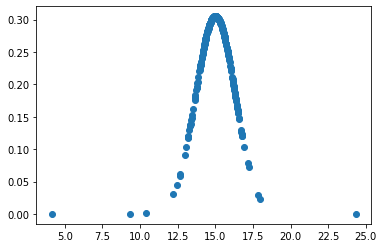

In [8]:
plt.scatter(X[:,1],prob[:,1])

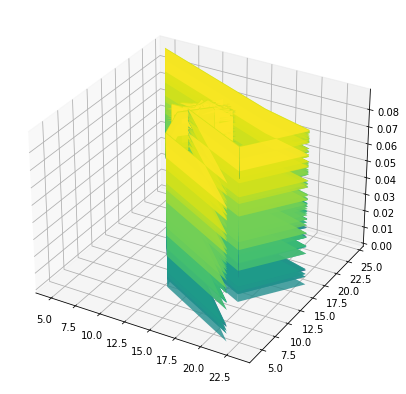

In [9]:
#plot d'univarié
yproba =(prob[:, 0]*prob[:, 1])[:, np.newaxis]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.plot_surface(X[:,0], X[:,1], yproba, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.8)

In [10]:
#avec Xval et Yval
X = np.genfromtxt('Xval.csv', delimiter=',', dtype=float)
Y = np.genfromtxt('Yval.csv', delimiter=',', dtype=float)[:, np.newaxis]
X.shape , Y.shape

((307, 2), (307, 1))

In [11]:
m = np.mean(X, axis=0)
v = np.var(X, axis=0)
proba = calculProba(X, m, v) 


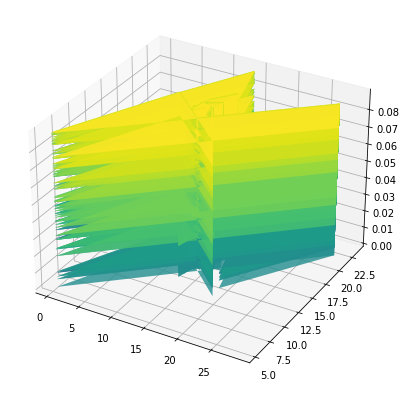

In [12]:
#plot
yproba = (prob[:,0]*prob[:,1])[:, np.newaxis]
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.plot_surface(X[:,0], X[:,1], yproba, cmap="viridis", rstride=3, cstride=3,edgecolor='none',alpha=0.8)

In [13]:
f1_scores = []
proba = calculProba(X, m, v)
yproba = proba[:,0]*proba[:,1]
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(Y, y_pred)))

In [14]:
#choix de epsilon
bestPrecison=max(f1_scores, key=lambda c: c[1])
epsilon_=bestPrecison[0]
print(epsilon_)

0.0002


In [22]:
#multivariable
def multiGauss(X, m, cov):
    
    return (1 / np.sqrt(2 * np.pi * np.linalg.det(cov))) * np.exp((- 1 / 2) * (((X - m) @ np.linalg.inv(cov)) * (X - m)).sum(axis=1))[:, np.newaxis]

In [23]:
m = np.mean(X, axis=0)
cov = np.cov(X.T)
proba = multiGauss(X, m, cov)
print(proba.shape)

(307, 1)


In [25]:
f1_scores = []
yproba = proba
for epsilon in np.arange(0, 1, 0.0001):
    y_pred = np.ones(yproba.shape)
    y_pred[yproba >= epsilon] = 0
    f1_scores.append((epsilon, f1_score(Y, y_pred)))

In [26]:
#choix de epsilon
threshold =max(f1_scores, key=lambda c: c[1])
epsilon_=threshold [0]
print(threshold )
print(epsilon_)

(0.0001, 0.8750000000000001)
0.0001


# Travail à faire
- 1) Nous aimerions bien choisir le epsilon, ceci est fait en analysant le score F1 obtenu precedenmment
- 2) nous aimerions appliquer une gaussienne multivariée à nos caracterisqtues; et comparer les deux résultats (multiplication des gaussiennes univariées, et gaussienne multivariée)
- 3) Nous aimerions visualiser en 3D la multiplication des gaussiennes univariées et la gaussienne multivariée pour comparaison. 
- 4) **** En Bonus - PAS obligatoire **** : nous aimerions utiliser la loi de Bayes afin de classifier nos exemples. Pour cela, voir le cours.


# Consignes

Le travail est à remettre par groupe de 4 au maximum [1..4].

Le délai est le Lundi 23 Mai 2022 à 22h


In [27]:
# bonne chance